# 排序

排序算法主要可以分为时间复杂度为 $O(n^2)$ 的基本排序算法和时间复杂度为 $O(nlogn)$ 的高级排序算法。

基本排序算法包括：
* 选择排序
* 插入排序
* 冒泡排序

高级排序算法包括：
* 快速排序
* 希尔排序
* 归并排序
* 堆排序

以下为排序使用的一些基本操作，如交换数组中夺得两个元素，打印数组等。

In [1]:
abstract class Sort<T extends Comparable> {
    public abstract void sort(T[] data);
    
    // 交换数组元素
    protected final void swap(T[] data, int i, int j) {
        if (i < 0 || j < 0 || i >= data.length || j >= data.length) {
            throw new IllegalArgumentException();
        }
        T temp = data[i];
        data[i] = data[j];
        data[j] = temp;
    }
}

In [2]:
// 打印数组
<T extends Comparable> void print(T[] data) {
    for (int i = 0; i < data.length; i++) { 
        System.out.printf("%s ", data[i].toString());
    }
    System.out.println();
}

In [3]:
// 生成测试数组
import java.util.Random;
Integer[] getRandomIntegerArray(int length, int low, int high) {
    if (length <= 0 || low >= high) {
        throw new IllegalArgumentException();
    }
    Integer[] res = new Integer[length];
    Random random = new Random(System.currentTimeMillis());
    for (int i = 0; i < length; i++) {
        res[i] = low + random.nextInt(high - low);
    }
    return res;
}
// 生成浮点数数组
Double[] getRandomDoubleArray(int length, double low, double high) {
    if (length <= 0 || low >= high) {
        throw new IllegalArgumentException();
    }
    Double[] res = new Double[length];
    Random random = new Random(System.currentTimeMillis());
    for (int i = 0; i < length; i++) {
        res[i] = low + random.nextDouble(high - low);
    }
    return res;
}

In [4]:
// 测试排序算法耗时
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

<T extends Comparable> boolean isSorted(T[] data) {
    for (int i = 0; i < data.length - 1; i++) {
        if (data[i].compareTo(data[i + 1]) > 0) {
            return false;
        }
    }
    return true;
}

XYChart testSort(String sortName, Sort<Integer> sort) {
    display("Sort: " + sortName + " Start");
    double[] x = new double[10];
    double[] y = new double[10];
    for (int i = 1 ; i <= 10; i++) {
        x[i-1] = 1000 * i;
        long sum = 0;
        for (int j = 0; j < 20; j++) {
            Integer[] data = getRandomIntegerArray(1000 * i, 0, 1000 * i);
            long start = System.currentTimeMillis();
            sort.sort(data);
            long result = System.currentTimeMillis() - start;
            assert isSorted(data);
            sum += result;
            try {
                Thread.sleep(10);
            } catch(Exception e) {
                e.printStackTrace();
            }
        }
        y[i-1] = sum / 20;
        display("Sort " + (1000 * i) + " numbers complete, average time " + (sum / 20) + " ms");
    }
    XYChart chart = QuickChart.getChart("Sort Time Chart", "numbers", "time", sortName, x, y);
    return chart;
}

## 基本排序算法
简单排序算法的优点：
* 基础
* 实现简单，是简单情形的首选
* 在一些特殊情况下，简单排序算法可能更有效
* 简单排序可以衍生出高级的排序算法
* 简单排序算法可以作为子过程改善高级排序算法

### 选择排序

选择排序将待排序数组分为两个部分：位于数组前部的有序部分和位于数组后方的无序部分。每次循环时，选择无序部分的最值，将其与无需部分的第一个值交换，放入有序部分，直到无需部分为空。

#### 算法实现

In [5]:
class SelectionSort<T extends Comparable> extends Sort<T> {
    public void sort(T[] data) {
        for (int i = 0; i < data.length; i++) {
            // 查找最小值并交换，加入有序部分
            int index = findMin(data, i);
            swap(data, i, index);
        }
    }
    
    // 查找最小值
    private int findMin(T[] data, int start) {
        int index = start;
        T min = data[start];
        for (int i = start + 1; i < data.length; i++) {
            if (min.compareTo(data[i]) > 0) {
                min = data[i];
                index = i;
            }
        }
        return index;
    }
}

#### 算法测试
测试排序算法

In [6]:
XYChart chart = testSort("Selection Sort", new SelectionSort());

Sort: Selection Sort Start

Sort 1000 numbers complete, average time 2 ms

Sort 2000 numbers complete, average time 3 ms

Sort 3000 numbers complete, average time 8 ms

Sort 4000 numbers complete, average time 12 ms

Sort 5000 numbers complete, average time 22 ms

Sort 6000 numbers complete, average time 29 ms

Sort 7000 numbers complete, average time 38 ms

Sort 8000 numbers complete, average time 51 ms

Sort 9000 numbers complete, average time 65 ms

Sort 10000 numbers complete, average time 78 ms

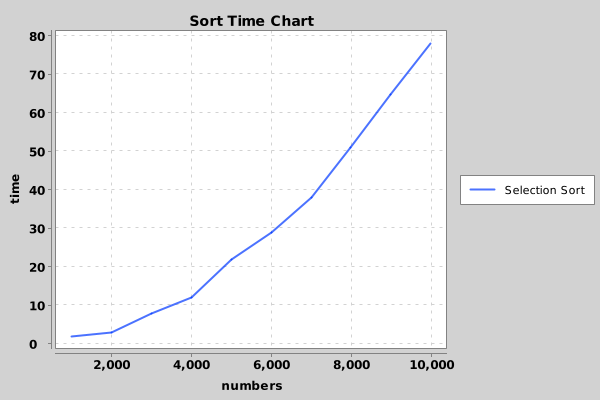

In [7]:
BitmapEncoder.getBufferedImage(chart);

选择排序使用了两层循环，第一层为将无序部分的最值加入有序部分，第二层为在无需部分中查找最值。

第一层循环共进行 $n$ 次，第 $i$ 次循环中的查找最值部分遍历数组 $n - i$ 次，遍历数组的次数为：
$$
\sum_{i=0}^{n-1}{n-i} = \frac{n(n-1)}{2}
$$

时间复杂度为：$O(n^2)$，n 为排序数组的长度。
实际运行时间随数组大小变化曲线如上图，近似平方关系。

选择排序在对任何数组进行排序时访问数组次数都不变，在排序无序数组和近似有序数组时花费时间相似。

### 插入排序

插入排序也将数组分为有序部分与无序部分，有序部分在前，无序部分在后。对长度为 $n$ 的数组进行插入排序，需要进行 $n$ 次循环，每次循环将无序部分的第一个元素按顺序插入到有序部分当中。

#### 算法实现

In [8]:
class InsertionSort<T extends Comparable> extends Sort<T> {
    public void sort(T[] data) {
        for (int i = 1; i < data.length; i++) {
            int index = findIndex(data, i);
            insert(data, index, i);
        }
    }
    // 线性查找法查找插入的位置
    private int findIndex(T[] data, int index) {
        int result = 0;
        for (result = 0; result < index && data[result].compareTo(data[index]) <= 0; result++) {
        }
        return result;
    }
    private void insert(T[] data, int index, int place) {
        T temp = data[place];
        for (int i = place; i > index; i--) {
            data[i] = data[i-1];
        }
        data[index] = temp;
    }
}

#### 算法测试
测试排序结果：

In [9]:
Integer[] data = getRandomIntegerArray(100, 0, 100);
new InsertionSort().sort(data);
print(data);

2 3 3 6 8 9 15 15 15 16 16 17 18 18 18 19 20 21 21 23 23 27 27 28 29 30 31 32 33 35 35 36 37 37 39 39 40 41 42 43 43 43 44 44 45 45 45 45 45 46 46 46 47 47 47 48 48 49 54 55 56 60 60 60 61 62 62 63 65 66 70 70 71 72 73 73 76 76 76 77 77 78 81 81 81 83 84 84 85 85 86 86 87 88 89 89 91 94 95 97 


In [10]:
XYChart chart = testSort("Insertion Sort", new InsertionSort());

Sort: Insertion Sort Start

Sort 1000 numbers complete, average time 3 ms

Sort 2000 numbers complete, average time 3 ms

Sort 3000 numbers complete, average time 6 ms

Sort 4000 numbers complete, average time 8 ms

Sort 5000 numbers complete, average time 14 ms

Sort 6000 numbers complete, average time 18 ms

Sort 7000 numbers complete, average time 25 ms

Sort 8000 numbers complete, average time 33 ms

Sort 9000 numbers complete, average time 42 ms

Sort 10000 numbers complete, average time 53 ms

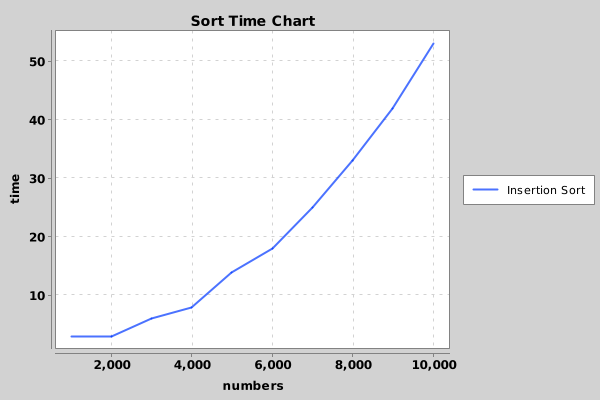

In [11]:
BitmapEncoder.getBufferedImage(chart);

插入排序需要进行 $n$ 次循环，每次循环都要在有序部分当中寻找插入的位置，在第 $i$ 次循环中，查找插入位置平均遍历数组次数为 $\frac{i}{2}$ 次，还需要大约 $\frac{i}{2}$ 次移动位置，可见插入排序的遍历次数比选择排序相当，总遍历次数为：
$$
\sum_{i=1}^{n}{(\frac{i}{2} + \frac{i}{2})} = \frac{n(n-1)}{2}
$$
时间复杂度为 $O(n^2)$ 阶。
上面的测试结果也表明了，排序时间与数组长度近似平方关系。

#### 算法优化
在上面的插入排序算法实现中，我们采用直接查找法查找来寻找插入的位置，我们可以使用二分查找法查找位置来优化排序算法。

In [12]:
class BinInsertionSort<T extends Comparable> extends Sort<T> {
    public void sort(T[] data) {
        for (int i = 1; i < data.length; i++) {
            int index = findIndex(data, i);
            insert(data, index, i);
        }
    }
    // 二分查找法查找插入的位置
    private int findIndex(T[] data, int index) {
        return findIndex(data, index, 0, index - 1);
    }
    
    private int findIndex(T[] data, int index, int start, int end) {
        // start 等于 end 时，判断 插入位置是否小于等于目标，若是则插入位置后移一位，否则插入位置不变
        if (start == end) {
            // 搜索区间为空，进一步判断插入位置并返回
            if (data[start].compareTo(data[index]) <= 0) {
                return start + 1;
            } else {
                return start;
            }
        }
        // 找到中间值
        int mid = start + (end - start) / 2;
        if (data[mid].compareTo(data[index]) < 0) {
            // 中间值小于目标时，到后半部分查找，一定不包含该中间值，mid + 1
            return findIndex(data, index, mid + 1, end);
        } else {
            // 中间值大于等于目标时，到前半部分查找，插入位置可能为中间值，递归查询右值为 mid，不需要减一
            // 不断将搜索区间向左收缩
            return findIndex(data, index, start, mid);
        }
    }
    
    private void insert(T[] data, int index, int place) {
        T temp = data[place];
        for (int i = place; i > index; i--) {
            data[i] = data[i-1];
        }
        data[index] = temp;
    }
}

In [13]:
Integer[] data = getRandomIntegerArray(100, 0, 100);
new BinInsertionSort().sort(data);
print(data);

0 0 1 1 2 4 4 4 5 7 7 9 9 10 10 11 11 13 14 14 15 15 15 17 17 18 18 18 21 21 22 22 22 23 23 23 26 28 28 28 28 30 30 31 32 32 33 37 40 40 40 45 47 47 48 50 51 54 54 56 56 58 59 59 60 60 61 62 63 64 64 65 65 67 68 69 69 69 71 72 72 73 73 76 78 78 80 81 81 82 83 87 90 92 92 93 93 94 96 98 


In [14]:
XYChart chart = testSort("Binary Search Insertion Sort", new BinInsertionSort());

Sort: Binary Search Insertion Sort Start

Sort 1000 numbers complete, average time 2 ms

Sort 2000 numbers complete, average time 1 ms

Sort 3000 numbers complete, average time 4 ms

Sort 4000 numbers complete, average time 6 ms

Sort 5000 numbers complete, average time 9 ms

Sort 6000 numbers complete, average time 13 ms

Sort 7000 numbers complete, average time 18 ms

Sort 8000 numbers complete, average time 24 ms

Sort 9000 numbers complete, average time 30 ms

Sort 10000 numbers complete, average time 37 ms

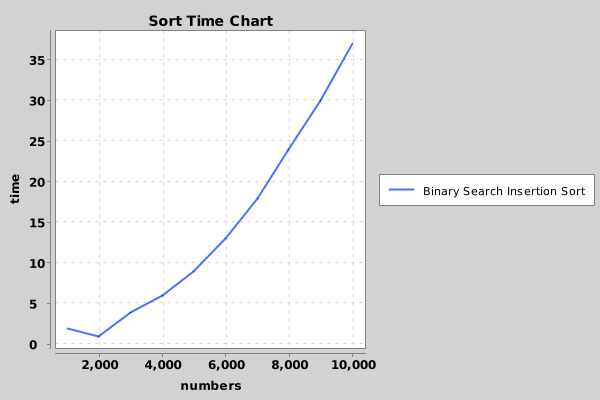

In [15]:
BitmapEncoder.getBufferedImage(chart);

使用二分查找优化时，查找插入位置时需要 $logi$ 次访问数组元素，提高了排序性能，由于插入时还需访问 $\frac{i}{2}$ 次数组，所以时间复杂度不变，为 $O(n^2)$。

插入排序还可以将寻找插入位置和移动数组元素同时进行，这样也可以优化算法时间。

步骤为：对于每一个位置，如果它的前一个元素大于目标值，则将该元素前一个元素移动到该位置，对前一个位置继续此过程，直到前一个元素小于目标值或没有前一个元素，此时将目标值放入该位置，即完成了查找插入位置与插入元素统一的操作。

In [23]:
class MoveInsertionSort<T extends Comparable> extends Sort<T> {
    public void sort(T[] data) {
        for (int i = 1; i < data.length; i++) {
            findIndexAndMove(data, i);
        }
    }
    // 一边查找一边移动元素
    private void findIndexAndMove(T[] data, int index) {
        T temp = data[index];
        for (int i = index; i >= 0; i--) {
            if (i == 0) {
                data[i] = temp;
            } else {
                if (data[i - 1].compareTo(temp) > 0) {
                    data[i] = data[i - 1];
                } else {
                    data[i] = temp;
                    break;
                }
            }
        }
    }
}

In [30]:
Integer[] data = getRandomIntegerArray(100, 0, 100);
new MoveInsertionSort().sort(data);
print(data);

0 1 2 3 4 7 9 9 11 11 12 13 15 16 18 19 21 22 23 24 24 26 26 27 27 29 30 30 31 38 38 39 40 42 42 43 44 44 44 46 47 47 48 51 52 52 55 56 56 56 58 58 59 61 62 62 63 63 63 64 64 66 66 66 67 67 68 69 70 70 71 72 74 77 79 79 79 80 80 82 83 86 87 88 89 90 92 92 93 93 94 94 94 95 95 95 95 97 98 99 


In [28]:
XYChart chart = testSort("Move Search Insertion Sort", new MoveInsertionSort());

Sort: Move Search Insertion Sort Start

Sort 1000 numbers complete, average time 1 ms

Sort 2000 numbers complete, average time 4 ms

Sort 3000 numbers complete, average time 9 ms

Sort 4000 numbers complete, average time 16 ms

Sort 5000 numbers complete, average time 25 ms

Sort 6000 numbers complete, average time 36 ms

Sort 7000 numbers complete, average time 50 ms

Sort 8000 numbers complete, average time 65 ms

Sort 9000 numbers complete, average time 85 ms

Sort 10000 numbers complete, average time 104 ms

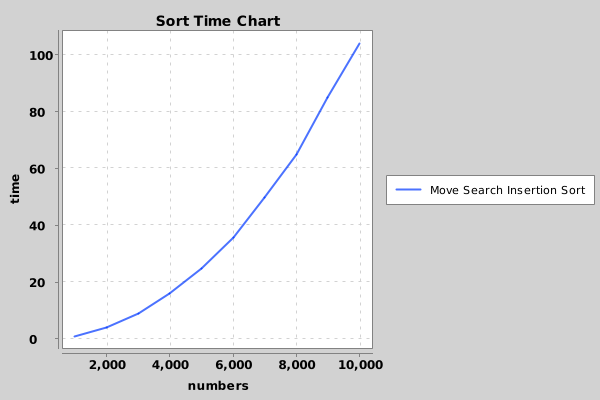

In [29]:
BitmapEncoder.getBufferedImage(chart);

经过上述优化过的插入排序相对于选择排序，其循环过程在找到插入位置后就会终止，在近似有序的排序中其时间复杂度接近于 $O(n)$。

### 冒泡排序

从头又开始，依次比较两个相邻的元素，如果第一个大于第二个则将它们交换位置，直到到达数组末尾，这时，数组末尾元素为最大的元素，再从头开始，到数组倒数第二个元素，当数组有序时排序结束。

#### 算法实现

In [33]:
class BubbleSort<T extends Comparable> extends Sort<T> {
    public void sort(T[] data) {
        int end = data.length - 2;
        while (end >= 0) {
            boolean flag = false;
            for (int i = 0; i <= end; i++) {
                if (data[i].compareTo(data[i + 1]) > 0) {
                    swap(data, i, i + 1);
                    flag = true;
                }
            }
            end--;
            if (!flag) {
                break;
            }
        }
    }
}

In [34]:
Integer[] data = getRandomIntegerArray(100, 0, 100);
new BubbleSort().sort(data);
print(data);

2 2 4 4 4 6 6 7 8 8 9 9 10 14 15 17 18 22 23 24 25 25 25 27 28 28 28 28 29 29 30 31 31 32 32 34 36 38 39 40 42 43 43 45 47 48 48 49 49 49 51 51 52 52 52 54 54 54 55 56 56 57 57 59 60 60 60 60 60 61 61 66 67 70 72 72 73 73 75 75 77 79 81 86 87 88 88 89 89 90 90 92 93 94 95 95 95 96 98 98 


In [35]:
XYChart chart = testSort("Bubble Sort", new BubbleSort());

Sort: Bubble Sort Start

Sort 1000 numbers complete, average time 5 ms

Sort 2000 numbers complete, average time 11 ms

Sort 3000 numbers complete, average time 26 ms

Sort 4000 numbers complete, average time 47 ms

Sort 5000 numbers complete, average time 78 ms

Sort 6000 numbers complete, average time 116 ms

Sort 7000 numbers complete, average time 162 ms

Sort 8000 numbers complete, average time 215 ms

Sort 9000 numbers complete, average time 276 ms

Sort 10000 numbers complete, average time 345 ms